## Pandas (Python Data Analysis Library)

https://pandas.pydata.org/pandas-docs/stable/


 [pandas cheat sheet ](http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

## 개요

데이터 분석을 위한 파이선 라이브러리  
pandas는 numpy 라이브러리 기반으로 개발

* 사용 가능한 데이터 유형  
  * SQL 테이블 또는 Excel 스프레드 시트에서와 같이 서로 다른 데이터형으로 열을 구성하는 테이블 형식 데이터  
  * 정렬되거나 정렬되지 않은 시계열 데이터.  
  * 행, 열의 레이블이 포함 행렬 데이터  
  * 서로 다른 형태의 관찰 또는 통계 데이터 집합  

* pandas 데이터 구조
 * Series :  같은 자료형으로 구성된 1 차원 배열 구조
 * DataFrame : 서로 다른 데이터 형으로 구성가능한 2 차원 테이블 구조 (R의 DataFrame이 제공하는 기능과 유사)


###  장점
* missing data (NaN)  
* inserted and deleted from DataFram  
* group by  
* easy to convert  
* slicing, fancy indexing, and subsetting  
* merging and joining   
* reshaping  
* saving / loading data : flat files (CSV), Excel files, databases, and saving / loading data  
* Time series data processing

### 1. 데이터 객체 생성


### 1)Series

모든 데이터 유형 (정수, 문자열, 부동 소수점 수, 파이썬 객체 등)을 포함할 수 있는 일차원 레이블 배열  

   **s = pd.Series(data, index=index)**
         
         
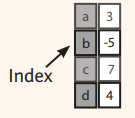


In [1]:
import numpy as np
import pandas as pd
from IPython.display import display

In [2]:
#Series, python list로 생성, 인덱스 자동생성(순번)
s1 = pd.Series([10,20,30,40,50])  
display("s1=", s1)
print("index=", s1.index)
print("Values=", s1.values)

#Series, python list로 생성, 인덱스(레이블) 포함
s2 = pd.Series([10,20,30,40,50], index=['a', 'b', 'c', 'd', 'e']) 
display("s2=", s2)
print("index=", s2.index)
print("values=", s2.values)

's1='

0    10
1    20
2    30
3    40
4    50
dtype: int64

index= RangeIndex(start=0, stop=5, step=1)
Values= [10 20 30 40 50]


's2='

a    10
b    20
c    30
d    40
e    50
dtype: int64

index= Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
values= [10 20 30 40 50]


In [4]:
#Series, numpy ndarray로 생성
s1 = pd.Series(np.random.randn(5)) 
s2 = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e']) 
display("s1=", s1)
display("s2=", s2)

#Series, 파이선 dicts, KEY-VALUE 로 생성
d = {'b': 1, 'a': 0, 'c' : 2}  
s3 = pd.Series(d)  #Key는 레이블로 처리
display("s3=", s3)

#Series, 하나의 값으로 생성, scalar value
s4= pd.Series(5., index=['a', 'b', 'c', 'd', 'e']) 
display("s4=", s4)

#Series, numpy의 ndarray와 유사한 속성으로 차원, 형태, 타입 확인
print("s1.ndim=", s1.ndim)
print("s1.shape=", s1.shape)
print("s1.dtype=", s1.dtype)

's1='

0    0.488914
1    0.326131
2   -1.158671
3   -0.805848
4   -1.305248
dtype: float64

's2='

a   -1.028073
b    0.926129
c    0.144403
d   -1.204910
e   -0.262983
dtype: float64

's3='

b    1
a    0
c    2
dtype: int64

's4='

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

s1.ndim= 1
s1.shape= (5,)
s1.dtype= float64


In [6]:
#Series, numpy의 ndarray와 유사한 인덱싱, 슬라이싱
display("s1=", s1)
display("s1[0]=", s1[0])         #index 0에 해당하는 값
display("s1[:2]=", s1[:2])       #처음부터 index (2-1)
display("s1[1:5:2]=", s1[1:5:2]) #1부터 index (5-1), step 2
display("s1[3:]=", s1[3:])       #3부터 끝까지
display("s1[-2:]=", s1[-2:])    #끝에서 두번째부터 끝까지

#Series, 파이선 dicts와 유사한 인덱싱
print("s3['a']=", s3['a'])           #'a' 인덱스의 값 추출
print("s3.get('a')=", s3.get('a'))
print ("'c' in s3 = ", 'c' in s3)  #s3 인덱스에 'c'존재여부 판단

's1='

0    0.488914
1    0.326131
2   -1.158671
3   -0.805848
4   -1.305248
dtype: float64

's1[0]='

0.488914437652313

's1[:2]='

0    0.488914
1    0.326131
dtype: float64

's1[1:5:2]='

1    0.326131
3   -0.805848
dtype: float64

's1[3:]='

3   -0.805848
4   -1.305248
dtype: float64

's1[-2:]='

3   -0.805848
4   -1.305248
dtype: float64

s3['a']= 0
s3.get('a')= 0
'c' in s3 =  True


In [7]:
# 배열 연산 
display("s3  =", s3 )  
display("s3 + 2 =", s3 + 2)  #배열 요소의 합
print("s3.sum() =", s3.sum())  #배열의 합
display("s4  =", s4 )  
s5=s3 + s4
display("s3 + s4 =",s5 )  #배열 요소의 합
print("s5.count()=", s5.count()) #nan이 아닌 값의 개수 

's3  ='

b    1
a    0
c    2
dtype: int64

's3 + 2 ='

b    3
a    2
c    4
dtype: int64

s3.sum() = 3


's4  ='

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

's3 + s4 ='

a    5.0
b    6.0
c    7.0
d    NaN
e    NaN
dtype: float64

s5.count()= 3


In [8]:
# 통계함수 , 연산
display("s1 = ", s1)
m = s1.mean()
print("s1.mean()=", m)  
print("s1.median()=", s1.median())  
display("s1[s1 >= s1.mean()]=", s1[s1 >= m]) #평균이상인 값 

#Normalization  = (x  -  mean) / Standard deviation
s1n = (s1 - s1.mean()) / s1.std()
display("s1 normalization=", s1n) 

's1 = '

0    0.488914
1    0.326131
2   -1.158671
3   -0.805848
4   -1.305248
dtype: float64

s1.mean()= -0.49094437293096843
s1.median()= -0.8058480786905219


's1[s1 >= s1.mean()]='

0    0.488914
1    0.326131
dtype: float64

's1 normalization='

0    1.163729
1    0.970399
2   -0.793026
3   -0.373995
4   -0.967107
dtype: float64

In [80]:
#Value counts (histogramming)
data = np.random.randint(1, 7, size=30)
s = pd.Series(data)
vc = s.value_counts()
display("s=",s)
display("value_counts()=",vc)   #값의 빈도수
print("s.mode()=", s.mode())    #최빈값
print("idxmax()=", vc.idxmax()) #최대값 인덱스
print("idxmin()=", vc.idxmin()) #최소값 인덱스

#sort
si = vc.sort_index()     #인덱스 정렬 (ascending True, 오름차순)
sv = vc.sort_values(ascending=False)   #값 정렬 (descending, 내림차순)
display("sort_index()=", si)
display("sort_value()=", sv)

's='

0     2
1     2
2     2
3     2
4     3
5     6
6     2
7     2
8     6
9     3
10    6
11    1
12    5
13    4
14    3
15    2
16    4
17    5
18    1
19    4
20    5
21    1
22    4
23    5
24    3
25    5
26    1
27    6
28    6
29    1
dtype: int32

'value_counts()='

2    7
6    5
5    5
1    5
4    4
3    4
dtype: int64

s.mode()= 0    2
dtype: int32
idxmax()= 2
idxmin()= 4


'sort_index()='

1    5
2    7
3    4
4    4
5    5
6    5
dtype: int64

'sort_value()='

2    7
1    5
5    5
6    5
3    4
4    4
dtype: int64

### 실습 #1. Series 연습
1. 10명의 점수를 series로 생성 (점수 범위: 0~100), 인덱스는 1번부터 순차로 부여
2. 1번부터 3번까지 추출
3. 평균, 최대, 최소값 확인
4. 평균보다 작은 점수만 추출
5. 점수가 큰순서로 정렬

### 2)DataFrame

 * 서로 다른 자료형으로 열을 구성할 수 있는 2 차원 데이터 구조  
 * 행의 레이블 index, 열의 레이블 columns 사용 
 * 엑셀 스프레드시트, SQL 테이블, Series 객체의 dict 구조  
 
 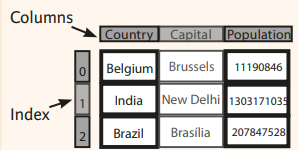
 

**(1)DataFrame 생성**    

In [19]:
#DataFrame 생성 
#DataFrame: data + index + columns
#DataFrame, From ndarrays, list
data = np.random.randint(8, size=(5, 3)) #random number
idx = np.arange(5)
col = list('ABC')
df = pd.DataFrame(data, index=idx, columns=col)  #data, 핼, 열 레이블 설정
display(df)  #DataFrame 확인

,A,B,C
0,5,5,2
1,0,5,6
2,3,2,0
3,2,2,1
4,0,6,1


In [20]:
#DataFrame 속성 확인
print("df.dtypes = ", df.dtypes)    #데이터 타입들
print("df.index = ", df.index)      #행 레이블
print("df.columns = ", df.columns)  #열 레이블
print("df.values=", df.values)  # 데이터값들

df.dtypes =  A    int32
B    int32
C    int32
dtype: object
df.index =  Int64Index([0, 1, 2, 3, 4], dtype='int64')
df.columns =  Index(['A', 'B', 'C'], dtype='object')
df.values= [[5 5 2]
 [0 5 6]
 [3 2 0]
 [2 2 1]
 [0 6 1]]


In [26]:
#DataFrame, From ndarrays, list
data = np.random.randint(10, size=(5,4)) #random number
col = list('ABCD')
dates = pd.date_range('20200101', periods=5)
df2 = pd.DataFrame(data)  #data만으로 생성
df2.index = dates         #행 레이블 설정
df2.columns = col         #열레이블 설정
display("df2=", df2)

print("df2.dtypes = ", df2.dtypes)    #데이터 타입들
print("df2.index = ", df2.index)      #행 레이블
print("df2.columns = ", df2.columns)  #열 레이블
display("df2.values=", df2.values)  # 데이터값들


#DataFrame , From dict of ndarrays / lists
d = {'one': [1., 2., 3., 4.],
     'two': [4., 3., 2., 1.]}
df3 = pd.DataFrame(d)
df4 = pd.DataFrame(d, index=['a', 'b', 'c', 'd'])
display("df3=", df3)
display("df4=", df4)

#DataFrame , From dict of Series or dicts
d = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df5 = pd.DataFrame(d)
display("df5=", df5)

#서로 다른 자료형으로 구성된 데이터프레임 생성
df6 = pd.DataFrame({'A': 1.,
                     'B': pd.Timestamp('20200101'), 
                     'C': pd.Series(1, index=[0,1,2,3], dtype='float32'),
                     'D': np.array([3,4,5,6], dtype='int32'),
                     'E': pd.Categorical(["test", "train", "test", "train"]),
                     'F' : 'foo'})
display("df6=", df6)
print("df6.dtypes=", df6.dtypes)


'df2='

,A,B,C,D
2020-01-01,0,5,5,1
2020-01-02,0,3,8,4
2020-01-03,7,0,7,1
2020-01-04,6,2,8,5
2020-01-05,5,0,7,5


df2.dtypes =  A    int32
B    int32
C    int32
D    int32
dtype: object
df2.index =  DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05'],
              dtype='datetime64[ns]', freq='D')
df2.columns =  Index(['A', 'B', 'C', 'D'], dtype='object')


'df2.values='

array([[0, 5, 5, 1],
       [0, 3, 8, 4],
       [7, 0, 7, 1],
       [6, 2, 8, 5],
       [5, 0, 7, 5]])

'df3='

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


'df4='

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


'df5='

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


'df6='

,A,B,C,D,E,F
0,1.0,2020-01-01,1.0,3,test,foo
1,1.0,2020-01-01,1.0,4,train,foo
2,1.0,2020-01-01,1.0,5,test,foo
3,1.0,2020-01-01,1.0,6,train,foo


df6.dtypes= A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


**(2)DataFrame 확인(Viewing)**  

In [30]:
#DataFrame 생성
data = np.random.randint(10, size=(7, 3))
col = list('XYZ')
dates = pd.date_range('20200101', periods=7)
df = pd.DataFrame(data,index=dates, columns=col) 
display(df)

#DataFrame display
print("df=", df)  #전체 출력
print("df.head()=", df.head()) #상단행 5개
print("df.tail(3)=", df.tail(3)) #하단행 3개

#DataFrame 속성
print("df.dtypes = ", df.dtypes)    #데이터 타입들
print("df.index = ", df.index)      #행 레이블
print("df.columns = ", df.columns)  #열 레이블
print("df.values = ", df.values)    #데이터

#통계요약
print("df.describe()=", df.describe())

#Sorting by an axis:
dfsi = df.sort_index(axis=0, ascending=False)  #axis=0 (row)
display(dfsi)

#Sorting by values:
dfvy= df.sort_values(by='Y')
display(dfvy)

,X,Y,Z
2020-01-01,7,0,0
2020-01-02,6,9,3
2020-01-03,3,0,2
2020-01-04,9,2,5
2020-01-05,4,1,8
2020-01-06,6,2,8
2020-01-07,9,8,1


df=             X  Y  Z
2020-01-01  7  0  0
2020-01-02  6  9  3
2020-01-03  3  0  2
2020-01-04  9  2  5
2020-01-05  4  1  8
2020-01-06  6  2  8
2020-01-07  9  8  1
df.head()=             X  Y  Z
2020-01-01  7  0  0
2020-01-02  6  9  3
2020-01-03  3  0  2
2020-01-04  9  2  5
2020-01-05  4  1  8
df.tail(3)=             X  Y  Z
2020-01-05  4  1  8
2020-01-06  6  2  8
2020-01-07  9  8  1
df.dtypes =  X    int32
Y    int32
Z    int32
dtype: object
df.index =  DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')
df.columns =  Index(['X', 'Y', 'Z'], dtype='object')
df.values =  [[7 0 0]
 [6 9 3]
 [3 0 2]
 [9 2 5]
 [4 1 8]
 [6 2 8]
 [9 8 1]]
df.describe()=               X         Y         Z
count  7.000000  7.000000  7.000000
mean   6.285714  3.142857  3.857143
std    2.288689  3.760699  3.236694
min    3.000000  0.000000  0.000000
25%    5.000000  0.500000  1.500000
50%

,X,Y,Z
2020-01-07,9,8,1
2020-01-06,6,2,8
2020-01-05,4,1,8
2020-01-04,9,2,5
2020-01-03,3,0,2
2020-01-02,6,9,3
2020-01-01,7,0,0


,X,Y,Z
2020-01-01,7,0,0
2020-01-03,3,0,2
2020-01-05,4,1,8
2020-01-04,9,2,5
2020-01-06,6,2,8
2020-01-07,9,8,1
2020-01-02,6,9,3


### 실습 #2. 데이터프레임 생성 연습

1) 5명의 성적 데이터 생성 (성명, 입학년도, 학점(0~4.5), 성별(M,F))  
열 : Name, Adyear, grade, sex    
행인덱스 : 순번   
2) 인덱스, 칼럼, 값들, 데이터타입 확인  
3)통계요약 확인  
4)성명순으로 정렬

### **(3)DataFrame,  Indexing / Selection**

  * loc[행레이블, 열레이블]  : 레이블로 행, 열 선택  
  * iloc(int, int)   : 위치값으로 행, 열 선택   

In [32]:
#DataFrame,  Indexing / Selection
d = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd']),
     'three': [5,6,7,8]}
df1 = pd.DataFrame(d)
display("df1=", df1)

#DataFrame,  row selection
display("df1[0:2]=", df1[0:2])                       #위치값 슬라이싱으로 선택
display("df1['a':'c']=", df1['a':'c'])               #행 레이블 슬라이싱으로 선택

display("df1.loc['a']=", df1.loc['a'])              #행 레이블로 선택
display("df1.loc['b':]=", df1.loc['b':])            #슬라이싱으로 여러행 선택
display("df1.loc[['a','c']]=", df1.loc[['a','c']])  #인덱스 배열로 여러 행 선택

display("df1.iloc[1]=", df1.iloc[1])                #행인덱스값으로 선택
display("df1.iloc[1:3]=", df1.iloc[1:3])

#DataFrame , Column selection,
display("df1['one']= ", df1['one'] )            #열레이블로 선택
display("df1.one= ", df1.one )                  #열레이블로 선택
display("df1[['one','three']]= ", df1[['one','three']] ) #열레이블 여러개 인덱스 배열로 선택

'df1='

,one,two,three
a,1.0,1.0,5
b,2.0,2.0,6
c,3.0,3.0,7
d,NaN,4.0,8


'df1[0:2]='

,one,two,three
a,1.0,1.0,5
b,2.0,2.0,6


"df1['a':'c']="

,one,two,three
a,1.0,1.0,5
b,2.0,2.0,6
c,3.0,3.0,7


"df1.loc['a']="

one      1.0
two      1.0
three    5.0
Name: a, dtype: float64

"df1.loc['b':]="

,one,two,three
b,2.0,2.0,6
c,3.0,3.0,7
d,NaN,4.0,8


"df1.loc[['a','c']]="

,one,two,three
a,1.0,1.0,5
c,3.0,3.0,7


'df1.iloc[1]='

one      2.0
two      2.0
three    6.0
Name: b, dtype: float64

'df1.iloc[1:3]='

,one,two,three
b,2.0,2.0,6
c,3.0,3.0,7


"df1['one']= "

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

'df1.one= '

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

"df1[['one','three']]= "

,one,three
a,1.0,5
b,2.0,6
c,3.0,7
d,NaN,8


In [33]:
#DataFrame , row, column selection,
display("df1.loc['a', 'one']=", df1.loc['a', 'one'])              #'a'행, 'one' 열
display("df1.loc[['a','c'], 'one']=", df1.loc[['a','c'], 'one'])  #['a','c']행, 'one' 열
display("df1.loc['a':'c', 'one':'two']=", df1.loc['a':'c',  'one':'two'])  #'a':'c'행,  'one':'two'열
display("df1.loc[:, ['one','three']]=", df1.loc[:, ['one','three']])  #['one','three']열의 모든행

display("df1['two']['a']= ", df1['two']['a'] )  #열레이블, 행레이블로 선택
display("df1['two']['b':]= ", df1['two']['b':] )  #열레이블, 행레이블 슬라이싱
display("df1['two'][2:]= ",df1['two'][2:] )     #열레이블, 행슬라이싱으로 선택

"df1.loc['a', 'one']="

1.0

"df1.loc[['a','c'], 'one']="

a    1.0
c    3.0
Name: one, dtype: float64

"df1.loc['a':'c', 'one':'two']="

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0


"df1.loc[:, ['one','three']]="

,one,three
a,1.0,5
b,2.0,6
c,3.0,7
d,NaN,8


"df1['two']['a']= "

1.0

"df1['two']['b':]= "

b    2.0
c    3.0
d    4.0
Name: two, dtype: float64

"df1['two'][2:]= "

c    3.0
d    4.0
Name: two, dtype: float64

In [34]:
#DataFrame ,bool indexing, 조건으로 인덱싱
#one 열의 값이 2이상인 경우
display("df1[df1.one >=2 ]= ", df1[df1.one >=2 ] )  
#one 열의 값이 1 ~ 2 범위인 경우
display("df1[(df1.one >= 1) & (df1.one <= 2) ]= ", df1[(df1.one >= 1) &  (df1.one <=2)] ) 
#one 열의 값이  2보다 작거나 3보다 큰 경우
display("df1[(df1.one < 2) | (df1.one > 3) ]= ", df1[(df1.one < 2) | (df1.one > 3) ] ) 
# one이 NaN인 경우
display("pd.isna(df1.one) =  ", pd.isna(df1.one) )  

'df1[df1.one >=2 ]= '

,one,two,three
b,2.0,2.0,6
c,3.0,3.0,7


'df1[(df1.one >= 1) & (df1.one <= 2) ]= '

,one,two,three
a,1.0,1.0,5
b,2.0,2.0,6


'df1[(df1.one < 2) | (df1.one > 3) ]= '

,one,two,three
a,1.0,1.0,5


'pd.isna(df1.one) =  '

a    False
b    False
c    False
d     True
Name: one, dtype: bool

### 실습 3. 데이터프레임 인덱싱 연습

5명의 성적 데이터 이용   
1)성명만 추출  
2)입학년도와 성적만 추출  
3)성명이 'kim'인 데이터만 추출  
4)입학년도가 2018년도 이상만 추출  
5)여성만 추출  
6)여성이면서 입학년도가 2019년도만 추출
7)성적이 3.5이상이거나 남성인 경우 추출

### **(4)DataFrame, setting**

In [35]:
#DataFrame 생성
data = np.zeros((5,3))
idx= list('abcde')
col = list('XYZ')
df = pd.DataFrame(data,index=idx, columns=col) 
display(df)

#행 슬라이싱 인덱스로 값설정
df[3:] = 1
df['a':'b'] = 2
display(df)

#열레이블을 기준으로 값설정
df['X']['a'] = 10
df['X']['c':] = 20
df['Y'][['a','c']] = 30
display(df)

#행열 레이블로 값설정
df.at[['c','e'], 'X':'Y'] = 100
df.loc['d', :2] = -100
display(df)

,X,Y,Z
a,0.0,0.0,0.0
b,0.0,0.0,0.0
c,0.0,0.0,0.0
d,0.0,0.0,0.0
e,0.0,0.0,0.0


,X,Y,Z
a,2.0,2.0,2.0
b,2.0,2.0,2.0
c,0.0,0.0,0.0
d,1.0,1.0,1.0
e,1.0,1.0,1.0


,X,Y,Z
a,10.0,30.0,2.0
b,2.0,2.0,2.0
c,20.0,30.0,0.0
d,20.0,1.0,1.0
e,20.0,1.0,1.0


,X,Y,Z
a,10.0,30.0,2.0
b,2.0,2.0,2.0
c,100.0,100.0,0.0
d,-100.0,-100.0,1.0
e,100.0,100.0,1.0


In [36]:
#행열 위치로 값설정
df.iat[2, 1] = 1
df.iloc[3:, :1] = -1
display(df)

#배열로  값설정
df.loc[:, 'Z'] = np.arange(5)
display(df)

#조건으로 값설정
df[df < 0] = 0
display(df)

,X,Y,Z
a,10.0,30.0,2.0
b,2.0,2.0,2.0
c,100.0,1.0,0.0
d,-1.0,-100.0,1.0
e,-1.0,100.0,1.0


,X,Y,Z
a,10.0,30.0,0
b,2.0,2.0,1
c,100.0,1.0,2
d,-1.0,-100.0,3
e,-1.0,100.0,4


,X,Y,Z
a,10.0,30.0,0
b,2.0,2.0,1
c,100.0,1.0,2
d,0.0,0.0,3
e,0.0,100.0,4


### **(5)DataFrame, addition, deletion**

#### deletion
- drop(): axis index (0 or ‘index’, default) or columns (1 or ‘columns’).  
  - df = df.drop(['column'], axis=1)  
  - df = df.drop(['row'])  


In [37]:
d = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df1 = pd.DataFrame(d)
display(df1)

#DataFrame , Row  addition
df1.loc['e'] = [10,10]  #새로운 index에 값 설정으로 추가
df1.loc['h'] = [5,6]   #새로운 index에 값 설정으로 추가
df1.loc['sum'] = df1.sum(axis=0)  #합을 구한 결과로 새로운 행 추가
display(df1)

#DataFrame, Row deletion
#drop 삭제 결과를 반환, 원본 유지
df1.drop(['e'])  #원본 유지 
df1.drop(['e'], inplace=True)  #원본에서 삭제
df1 = df1.drop(['sum'])        #반환으로 원본 수정
display(df1)

df2= df1.drop(['a', 'h']) 
display(df2)

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0
e,10.0,10.0
h,5.0,6.0
sum,21.0,26.0


,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0
h,5.0,6.0


,one,two
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [124]:
#DataFrame , Column  addition, deletion
df1['three'] = df1['one'] + df1['two']        #열의 합으로 새로운 열 three 생성
df1['flag'] = df1['one'] > 3                  #조건에 대한 논리값으로 새로운 열 flag 생성 
df1['class'] = 'bar'                          #문자열로 class열 생성
df1['one2'] = df1['one'][:2]                  #one 열의 2개행만으로 one2열 생성
display(df1)

del df1['two']                                 #two 열 삭제
display(df1)

df3=df1.drop(['one2'], axis=1)                # one2 column (axis=1) 삭제
display(df3)

tree = df1.pop('three')                       #three 열 삭제, 값을 반환 
print("three=", tree)
display(df1)

#missing value 처리
df2 =df1.fillna(value=1)    #누락된 값을 채움
df3=df1.dropna(how='any')  #누락된 값 있는 행삭제
df4=pd.isna(df1)           #마스크 생성
display(df1)
display(df2)
display(df3)
display(df4)

,one,two,three,flag,class,one2
a,1.0,1.0,2.0,False,bar,1.0
b,2.0,2.0,4.0,False,bar,2.0
c,3.0,3.0,6.0,False,bar,NaN
d,NaN,4.0,NaN,False,bar,NaN
h,5.0,6.0,11.0,True,bar,NaN


,one,three,flag,class,one2
a,1.0,2.0,False,bar,1.0
b,2.0,4.0,False,bar,2.0
c,3.0,6.0,False,bar,NaN
d,NaN,NaN,False,bar,NaN
h,5.0,11.0,True,bar,NaN


,one,three,flag,class
a,1.0,2.0,False,bar
b,2.0,4.0,False,bar
c,3.0,6.0,False,bar
d,NaN,NaN,False,bar
h,5.0,11.0,True,bar


three= a     2.0
b     4.0
c     6.0
d     NaN
h    11.0
Name: three, dtype: float64


,one,flag,class,one2
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,False,bar,NaN
d,NaN,False,bar,NaN
h,5.0,True,bar,NaN


,one,flag,class,one2
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,False,bar,NaN
d,NaN,False,bar,NaN
h,5.0,True,bar,NaN


,one,flag,class,one2
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,False,bar,1.0
d,1.0,False,bar,1.0
h,5.0,True,bar,1.0


,one,flag,class,one2
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0


,one,flag,class,one2
a,False,False,False,False
b,False,False,False,False
c,False,False,False,True
d,True,False,False,True
h,False,False,False,True


### (6)DataFrame,operation
https://pandas.pydata.org/pandas-docs/version/0.23.4/api.html

#### Descriptive statistics

통계함수 제공 :  sum(), mean(), quantile()..

함수 호출 구조 

  - 행방향 계산( default)   
   - 데이터프레임명.함수명(axis=0)  , 데이터프레임명.함수명(axis=“index”)  
   - df.sum(), df.sum(0) : 행방향 각 열의 합  
  - 열방향 계산   
    - 데이터프레임명.함수명(axis=1)  , 데이터프레임명.함수명(axis=“columns”)  
    - df.sum(1) :  열방향 각 행의 합

통계 함수 목록  

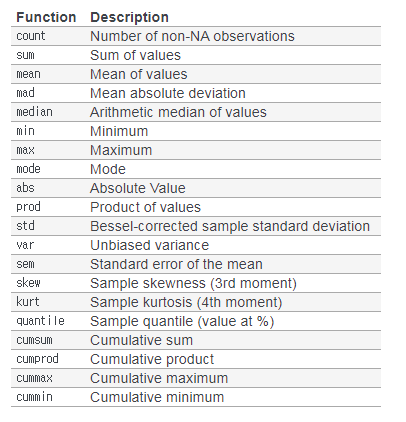


In [26]:
#통계함수 사용 예
data = np.random.randint(8, size=(5, 3)) #random number
idx = np.arange(5)
col = list('ABC')
df = pd.DataFrame(data, index=idx, columns=col)  #data, 핼, 열 레이블 설정
display(df)

print ("df.sum()=\n", df.sum())
print ("df.sum(0)=\n", df.sum(0))
print ("df.sum(1)=\n", df.sum(1))
print ("df['B'].sum()=\n", df['B'].sum())

,A,B,C
0,2,4,1
1,7,5,0
2,3,2,5
3,7,4,5
4,4,6,7


df.sum()=
 A    23
B    21
C    18
dtype: int64
df.sum(0)=
 A    23
B    21
C    18
dtype: int64
df.sum(1)=
 0     7
1    12
2    10
3    16
4    17
dtype: int64
df['B'].sum()=
 21


In [29]:
#통계함수 사용 예
data = np.floor((np.random.randn(7, 3) * 10))  #random number
dates = pd.date_range('20191101', periods=7)
df = pd.DataFrame(data)  #data만으로 생성
df.index = dates         #행 레이블 설정
df.columns = col         #열레이블 설정

count = df.count()
csum = df.sum()
rsum = df.sum(axis=1)  
rmean = df.mean(axis="columns")
mean = df.mean()
min1 = df.min()
max1 = df.max()

df2 = df.copy()
df2.loc['count'] = count
df2.loc['sum'] = csum
df2.loc['mean'] = mean
df2.loc['min'] = min1
df2.loc['max'] = max1
df2['rsum'] = rsum
df2['rmean'] = rmean
display(df2)

,A,B,C,rsum,rmean
2019-11-01 00:00:00,-4.000000,-1.000000,-6.000000,-11.0,-3.666667
2019-11-02 00:00:00,8.000000,-12.000000,0.000000,-4.0,-1.333333
2019-11-03 00:00:00,-1.000000,-12.000000,-10.000000,-23.0,-7.666667
2019-11-04 00:00:00,-4.000000,-7.000000,-6.000000,-17.0,-5.666667
2019-11-05 00:00:00,-10.000000,16.000000,-2.000000,4.0,1.333333
2019-11-06 00:00:00,-15.000000,-18.000000,-2.000000,-35.0,-11.666667
2019-11-07 00:00:00,-12.000000,-11.000000,-8.000000,-31.0,-10.333333
count,7.000000,7.000000,7.000000,NaN,NaN
sum,-38.000000,-45.000000,-34.000000,NaN,NaN
mean,-5.428571,-6.428571,-4.857143,NaN,NaN


### (7)DataFrame, File IO

https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html  

다양한 파일 형식으로 부터 데이터를 읽고 저장   
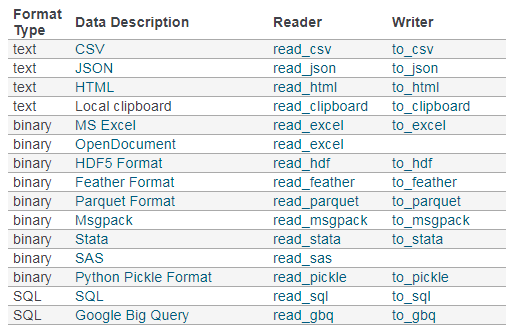

In [2]:
import os
cd = os.getcwd()  #현재 디렉토리 확인
print(cd)
print(os.listdir(cd)) #현재디렉토리 목록 확인

index=['kim', 'min', 'lee']
d = {'math': pd.Series([80, 90, 100]),
     'eng': pd.Series([90, 100, 88]) }
df = pd.DataFrame(d)
df.index = index
display(df)


df.to_csv('data/scores.csv')
df.to_excel('data/scores.xlsx', sheet_name='midsheet')

df2= pd.read_csv('data/scores.csv')
df3= pd.read_csv('data/scores.csv',index_col=0)
df4=  pd.read_excel('data/scores.xlsx', index_col=0, sheet_name='midsheet') 

display(df2)
display(df3)
display(df4)

C:\Users\hjsong\Documents\datamining
['.ipynb_checkpoints', 'data', 'datamining5_pandas.ipynb']


,math,eng
kim,80,90
min,90,100
lee,100,88


,Unnamed: 0,math,eng
0,kim,80,90
1,min,90,100
2,lee,100,88


,math,eng
kim,80,90
min,90,100
lee,100,88


,math,eng
kim,80,90
min,90,100
lee,100,88


## Merging

Append : 행단위로 결합  

Merge :  같은 key로 열단위 결합

In [53]:
#Appending 

d1= pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                 'A': ['A0', 'A1', 'A2', 'A3'],
                 'B': ['B0', 'B1', 'B2', 'B3']})
d2 = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                   'C': ['C0', 'C1', 'C2', 'C3'],
                   'D': ['D0', 'D1', 'D2', 'D3']})
display(d1)
display(d2)

d3 = d1.append(d2)   #row combining
display(d3)
d4 = d1.append(d2, ignore_index=True)
display(d4)

#merge
d5= pd.merge(d1, d2, on=['key'])  #key가 같은 데이터만 결합
display(d5)


,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K2
3,A3,B3,K3


,C,D,key
0,C0,D0,K0
1,C1,D1,K1
2,C2,D2,K2
3,C3,D3,K3


,A,B,C,D,key
0,A0,B0,NaN,NaN,K0
1,A1,B1,NaN,NaN,K1
2,A2,B2,NaN,NaN,K2
3,A3,B3,NaN,NaN,K3
0,NaN,NaN,C0,D0,K0
1,NaN,NaN,C1,D1,K1
2,NaN,NaN,C2,D2,K2
3,NaN,NaN,C3,D3,K3


,A,B,C,D,key
0,A0,B0,NaN,NaN,K0
1,A1,B1,NaN,NaN,K1
2,A2,B2,NaN,NaN,K2
3,A3,B3,NaN,NaN,K3
4,NaN,NaN,C0,D0,K0
5,NaN,NaN,C1,D1,K1
6,NaN,NaN,C2,D2,K2
7,NaN,NaN,C3,D3,K3


,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


## Categoricals

범주형 데이터, 그룹처리를 위한 데이터형

In [17]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})

display(df)
print(df.dtypes)

#raw_grade를 이용하여 category로 형변환하여 grade 열 추가
df["grade"] = df["raw_grade"].astype("category") 
df["raw_grade"].astype("category") 

display(df)
print(df.dtypes)

#의미있는 이름으로 변경
df["grade"].cat.categories = ["very good", "good", "very bad"] 
display(df)
print(df.dtypes)

#각 그룹의 개수 
s = df.groupby("grade").size()
print('grade size \n ', s)

#그룹으로 정렬
sdf = df.sort_values(by="grade") #정렬
display(sdf)

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


id            int64
raw_grade    object
dtype: object


,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


id              int64
raw_grade      object
grade        category
dtype: object


,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


id              int64
raw_grade      object
grade        category
dtype: object
grade size 
  grade
very good    3
good         2
very bad     1
dtype: int64


,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


## Grouping

Splitting :   GroupBy로  특정속성에 대한 그룹으로 데이터 분리  

Applying  :  그룹에 독립적으로 함수 적용  

Aggregations : 각 그룹에 대한 요약 통계 (또는 통계)를 계산  

In [24]:
df = pd.DataFrame({ 'name': ['kim','min','jin', 'song', 'lee'], 
                     'age': [20, 30, 25, 40, 23],
                     'sex': ['F','M','F','M',"M"],
                     'score': [100,50,80,90,98],
                     'class': pd.Categorical([1, 2,2,3,1,])})
                    
display(df)
print(df.dtypes)

print("\n## df.sum() ##")
print(df.sum())

print("\n## groupby (sex) ##")
grouped = df.groupby('sex')
#그룹 확인
for name, group in grouped:
       print("groupname: " , name)
       print("groupdata:")
       print(group)

#그룹 추출
f = grouped.get_group(name='F')
m = grouped.get_group(name='M')
print("\n## group (female) ##")
display(f)
print("\n## group (male) ##")
display(m)


# 그룹별 연산   
print('\n#grouped.sum()=')
print(grouped.sum())
print('\n#grouped.mean()=')
print(grouped.mean())

#그룹에 대한 요약 통계 
#agg함수에 계산할 통계함수를 포함하여 그룹별 게산
r1 = grouped.agg(['sum', 'mean', 'std'])
print('\n#grouped.agg()=\n', r1)

r2= grouped['score'].agg(['mean', 'std'])
print('\n#grouped[\'score\'].agg()=\n', r2)


,name,age,sex,score,class
0,kim,20,F,100,1
1,min,30,M,50,2
2,jin,25,F,80,2
3,song,40,M,90,3
4,lee,23,M,98,1


name       object
age         int64
sex        object
score       int64
class    category
dtype: object

## df.sum() ##
name     kimminjinsonglee
age                   138
sex                 FMFMM
score                 418
class                   9
dtype: object

## groupby (sex) ##


groupname:  F
groupdata:
  name  age sex  score class
0  kim   20   F    100     1
2  jin   25   F     80     2
groupname:  M
groupdata:
   name  age sex  score class
1   min   30   M     50     2
3  song   40   M     90     3
4   lee   23   M     98     1

## group (female) ##


,name,age,sex,score,class
0,kim,20,F,100,1
2,jin,25,F,80,2



## group (male) ##


,name,age,sex,score,class
1,min,30,M,50,2
3,song,40,M,90,3
4,lee,23,M,98,1



#grouped.sum()=
     age  score
sex            
F     45    180
M     93    238

#grouped.mean()=
      age      score
sex                 
F    22.5  90.000000
M    31.0  79.333333

#grouped.agg()=
     age                 score                      
    sum  mean       std   sum       mean        std
sex                                                
F    45  22.5  3.535534   180  90.000000  14.142136
M    93  31.0  8.544004   238  79.333333  25.716402

#grouped['score'].agg()=
           mean        std
sex                      
F    90.000000  14.142136
M    79.333333  25.716402


## Sampling
랜덤하게 샘플 추출


In [116]:
df = pd.DataFrame({ 'name': ['kim','min','jin', 'song', 'lee'], 
                     'age': [20, 30, 25, 40, 23],
                     'sex': ['F','M','F','M',"M"],
                     'score': [100,50,80,90,98],
                     'class': pd.Categorical([1, 2,2,3,1,])})

dfs1=df.sample(n=3)   # 3개만 임의 추출
dfs2=df.sample(n=3, random_state=1) #재현성을 위한 랜덤 시드 설정
dfs3=df.sample(n=3, weights='class') #class값으로 가중치 설정

display(dfs1)
display(dfs2)
display(dfs3)

,name,age,sex,score,class
0,kim,20,F,100,1
2,jin,25,F,80,2
1,min,30,M,50,2


,name,age,sex,score,class
2,jin,25,F,80,2
1,min,30,M,50,2
4,lee,23,M,98,1


,name,age,sex,score,class
0,kim,20,F,100,1
2,jin,25,F,80,2
3,song,40,M,90,3
